In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

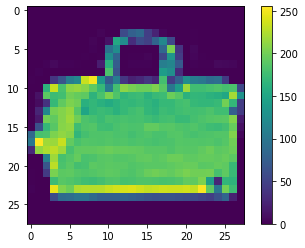

In [5]:
#melihat contoh satu data train
plt.figure()
plt.imshow(train_images[99])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#jadikan data menjadi 1 pixel dari 2828 pixel
train_images = train_images / 255.0

test_images = test_images / 255.0

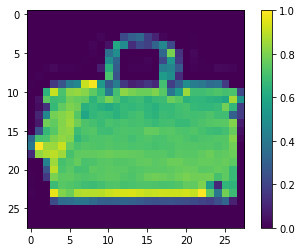

In [7]:
#cek gambar yang udah dijadiin 1 pixel 
plt.figure()
plt.imshow(train_images[99])
plt.colorbar()
plt.grid(False)
plt.show()

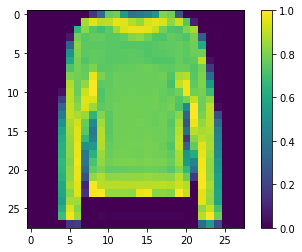

In [8]:
#cek gambar yang udah dijadiin 1 pixel  pada test data
plt.figure()
plt.imshow(test_images[99])
plt.colorbar()
plt.grid(False)
plt.show()

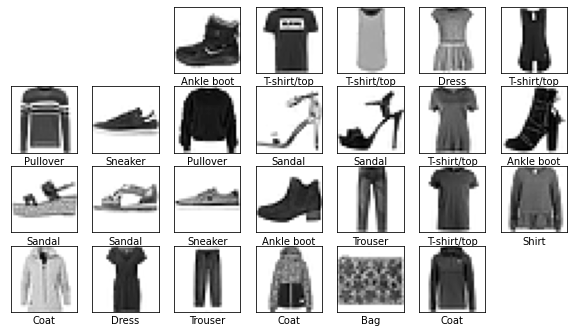

In [10]:
#verivikasi dulu, data dan label benar apa salah dengan menampilkan data training
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(7,7,i+3)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#tentukan brapa banyak layer anda
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #dimensi
    keras.layers.Dense(128, activation='relu'), #memakai sigmoid, dan 128 layer inputan
    keras.layers.Dense(10) #ada 10 kelas
])

In [0]:
#sebelum training, cek optimizer, loss, dan metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4940 - accuracy: 0.8264
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8638
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8771
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8844
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.8911
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8965
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.8991
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2562 - accuracy: 0.9036
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2463 - accuracy: 0.9089
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [14]:
#akurasi 93 persen
#sesudah training model data, sekarang kita membandingkan, performa model dengan data test. atau di bandingkan dengan hasil asli

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #verbose untuk animasi

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3753 - accuracy: 0.8821

Test accuracy: 0.882099986076355


In [0]:
#akurasi test hanya 88 persen, yasudahlah, nanti kita cek overfitting ato tidak
#membuat prediksi gambar dari fungsi logits, dengan tf.keras.Softmax
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])


In [0]:
predictions = probability_model.predict(test_images)

In [28]:
#prediksi model ke 9, hasilnya berupa 10 arrray, merepresentasikan model"confidence nya
predictions[9]

array([2.47595572e-17, 4.56639577e-19, 1.32867447e-18, 1.25642914e-18,
       2.11945304e-18, 1.36137865e-08, 1.08501591e-18, 9.99999762e-01,
       7.58864610e-15, 2.77959316e-07], dtype=float32)

In [30]:
#kode untuk melihat , kelas tebakan tertinggi
np.argmax(predictions[0])

9

In [0]:
#kelas 9, yaitu ankle boot. 
#marilah kita gambar dan representasikan semua kelas nya 
def plot_image(i, predictions_array, true_label, img):                          #mendefenisikan model ke i, array prediksi, label sebenernya, dan gambarnya
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

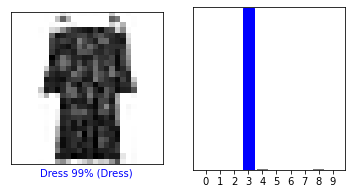

In [37]:
#mati kita ubah i semau kita, agar terlihat benar apa tidak nya gambar dan prediksi kita
i = 33
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

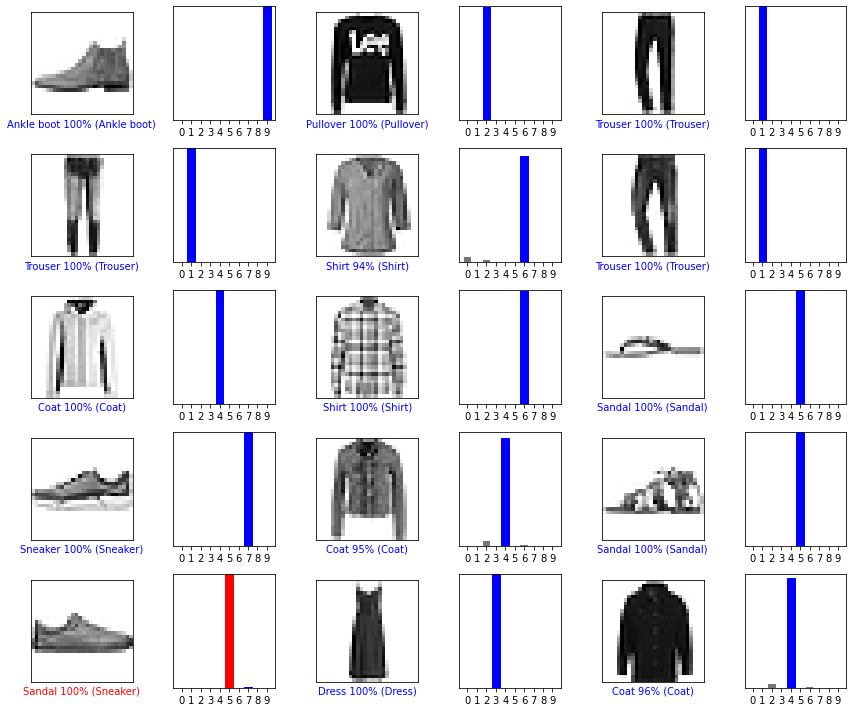

In [38]:
#marilah kita bersama memplot gambar dan semua prediksinya beserta ke confidence an nnya, 
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
[[1.4571815e-03 1.6237745e-19 9.9833703e-01 6.9065929e-12 1.1548310e-04
  7.3371566e-11 9.0156449e-05 1.8821344e-24 1.7587659e-07 4.8879280e-14]]


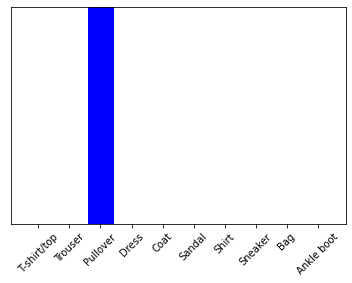

In [42]:
#pake satu model gambar untuk prediksi

#ambil data set
img = test_images[1]

print(img.shape)

#tambahkan gambar 

img = (np.expand_dims(img,0))
print(img.shape)

#sekarang predict
predictions_single = probability_model.predict(img)
print(predictions_single)

#plot confidence tertinggi dari predict
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [43]:
#model keberapakah itu
np.argmax(predictions_single[0])


2